In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#valores para detectar los tonos del color rojo segun la tabla de colores HSV
rojoBajo1 = np.array([0,140,90],np.uint8)
rojoAlto1 = np.array([8,255,255],np.uint8)
rojoBajo2 = np.array([160,140,90],np.uint8)
rojoAlto2 = np.array([180,255,255],np.uint8)

In [54]:
def detectar_fresa(imagen):
    #Cargamos la imagen 
    #imagen=cv2.imread("fresas.png")
    #creamos una mascara para detectar el color rojo
    imagen_hsv=cv2.cvtColor(imagen,cv2.COLOR_BGR2HSV)
    mascara_1=cv2.inRange(imagen_hsv,rojoBajo1,rojoAlto1)
    mascara_2=cv2.inRange(imagen_hsv,rojoBajo2,rojoAlto2)
    mascara=cv2.add(mascara_1,mascara_2)
    mascara=cv2.medianBlur(mascara,7)
    #mostramos solo la parte de la fresa madura
    detect_fresa=cv2.bitwise_and(imagen,imagen,mask=mascara)
    #detectamos el contorno de la fresa
    mascara =cv2.blur(mascara,ksize=(5,5))
    contorno= cv2.Canny(image=mascara,threshold1=100,threshold2=100)
    contorno_not=cv2.bitwise_not(contorno)
    #sumamos la imagen original con el contorno
    suma=cv2.bitwise_and(imagen,imagen,mask=contorno_not)
    #obtenemos el tamaño de la imagen
    ty,tx,td=suma.shape
    #añadimos un fondo verde
    fondo_verde=cv2.imread("fondo_azul.png")
    #cambiamos el tamaño del fondo, al tamaño de la imagen original
    fondo_verde=cv2.resize(fondo_verde,(tx,ty))
    #el contorno tendra ahora el color verde
    nuevo_fondo=cv2.bitwise_and(fondo_verde,fondo_verde,mask=contorno)
    imagen_final=cv2.add(suma,nuevo_fondo)
    #mostramos la imagen final por la consola
    imagen_final_plt=cv2.cvtColor(imagen_final,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen_final_plt)
    #guardamos la imagen
    cv2.imwrite("Fresa Madura.png",imagen_final)

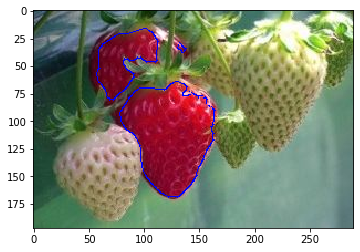

In [56]:
imagen=cv2.imread("fresas.png")
detectar_fresa(imagen)